Installa la libreria tensorflow, libreria specializzata per le DNNs.

In [4]:
!pip install tensorflow

Error processing line 1 of C:\Users\3204480343\Downloads\anaconda3\lib\site-packages\vision-1.0.0-py3.10-nspkg.pth:

  Traceback (most recent call last):
    File "C:\Users\3204480343\Downloads\anaconda3\lib\site.py", line 186, in addpackage
      exec(line)
    File "<string>", line 1, in <module>
    File "<frozen importlib._bootstrap>", line 568, in module_from_spec
  AttributeError: 'NoneType' object has no attribute 'loader'

Remainder of file ignored

[notice] A new release of pip is available: 23.2.1 -> 23.3.2
[notice] To update, run: python.exe -m pip install --upgrade pip


In [5]:
pip install graphviz

Note: you may need to restart the kernel to use updated packages.


Error processing line 1 of C:\Users\3204480343\Downloads\anaconda3\lib\site-packages\vision-1.0.0-py3.10-nspkg.pth:

  Traceback (most recent call last):
    File "C:\Users\3204480343\Downloads\anaconda3\lib\site.py", line 186, in addpackage
      exec(line)
    File "<string>", line 1, in <module>
    File "<frozen importlib._bootstrap>", line 568, in module_from_spec
  AttributeError: 'NoneType' object has no attribute 'loader'

Remainder of file ignored

[notice] A new release of pip is available: 23.2.1 -> 23.3.2
[notice] To update, run: python.exe -m pip install --upgrade pip


In [7]:
pip install pydot pydotplus

     ---------------------------------------- 0.0/278.7 kB ? eta -:--:--
     -------------------------- ----------- 194.6/278.7 kB 3.9 MB/s eta 0:00:01
     -------------------------------------- 278.7/278.7 kB 2.9 MB/s eta 0:00:00
  Preparing metadata (setup.py): started
  Preparing metadata (setup.py): finished with status 'done'
  Created wheel for pydotplus: filename=pydotplus-2.0.2-py3-none-any.whl size=24578 sha256=09509b773596f8d5683c4d9cd29c2326722be81ba56b2b77cf405bb21b78bb56
  Stored in directory: c:\users\3204480343\appdata\local\pip\cache\wheels\69\b2\67\08f0eef649af92df772c09f451558298e07fab1bc7cdf33db0
Successfully built pydotplus
Note: you may need to restart the kernel to use updated packages.


Error processing line 1 of C:\Users\3204480343\Downloads\anaconda3\lib\site-packages\vision-1.0.0-py3.10-nspkg.pth:

  Traceback (most recent call last):
    File "C:\Users\3204480343\Downloads\anaconda3\lib\site.py", line 186, in addpackage
      exec(line)
    File "<string>", line 1, in <module>
    File "<frozen importlib._bootstrap>", line 568, in module_from_spec
  AttributeError: 'NoneType' object has no attribute 'loader'

Remainder of file ignored

[notice] A new release of pip is available: 23.2.1 -> 23.3.2
[notice] To update, run: python.exe -m pip install --upgrade pip


-importazione delle librerie utili per il problema.
-impostazione semi per i generatori di numeri casuali di NumPy e TensorFlow.  utile per garantire la riproducibilità dei risultati quando si utilizzano operazioni che coinvolgono numeri casuali
-configurare la visualizzazione dei grafici generati da Matplotlib

In [8]:
import tensorflow as tf
from tensorflow import keras
import numpy as np
import os
import pandas as pd
from sklearn.model_selection import train_test_split

# to make this notebook's output stable across runs
np.random.seed(42)
tf.random.set_seed(42)

# To plot pretty figures
%matplotlib inline
import matplotlib as mpl
import matplotlib.pyplot as plt
mpl.rc('axes', labelsize=14)
mpl.rc('xtick', labelsize=12)
mpl.rc('ytick', labelsize=12)
print("Done!")


Done!


Let's start by loading the fashion MNIST dataset. Keras has a number of functions to load popular datasets in `keras.datasets`. The dataset is already split for you between a training set and a test set, but it can be useful to split the training set further to have a validation set:

caricare i dati, separare le immagini dalle etichette, ed effettuare il reshaping delle immagini da 784x1 a 28x28

In [9]:
df = pd.read_csv("emnist-letters.csv") #carica i dati in df

#separa le immagini dalle etichette e effettua reshuaping in 28x28
X = df.iloc[:,1:].to_numpy().reshape(-1, 28, 28, order="F")
y = df.iloc[:,0].to_numpy()-1  # Sottrai 1 per avere etichette da 0 a 25

X_train_full, X_test, y_train_full, y_test = train_test_split(X, y, test_size=0.2) #random_state=42

print("Done!")

Done!


The training set contains 71039 grayscale images, each 28x28 pixels:

In [10]:
#verifiche delle dimensioni
print("Dimensioni X_train_full:", X_train_full.shape)
print("Dimensioni y_train_full:", y_train_full.shape)
print("Dimensioni X_test:", X_test.shape)
print("Dimensioni y_test:", y_test.shape)
print("Done!")

Dimensioni X_train_full: (71040, 28, 28)
Dimensioni y_train_full: (71040,)
Dimensioni X_test: (17760, 28, 28)
Dimensioni y_test: (17760,)
Done!


Each pixel intensity is represented as a byte (0 to 255):

In [11]:
#meglio trasformali in uint8 perchè piu efficienti in termini di memoria, considerando che non 
#abbiamo bisogno di interi negativi e di questo spazio di memoria occupato
print(X_train_full.dtype) #int64, cioè i dati sono rappresentati come numeri interi a 64 bit
print(y_train_full.dtype)
print(X_test.dtype)
print(y_test.dtype)
print("Done!")

int64
int64
int64
int64
Done!


Converto i dati in uint8 perche hanno un range fino a 255, quindi occupo meno spazio in memoria

In [12]:
X_train_full = X_train_full.astype(np.uint8)
y_train_full = y_train_full.astype(np.uint8)
X_test = X_test.astype(np.uint8)
y_test = y_test.astype(np.uint8)

print(X_train_full.dtype)
print(y_train_full.dtype)
print(X_test.dtype)
print(y_test.dtype)
print("Done!")

uint8
uint8
uint8
uint8
Done!


Let's split the full training set into a validation set and a (smaller) training set. We also scale the pixel intensities down to the 0-1 range and convert them to floats, by dividing by 255.

In [13]:
#utilizziamo i primi 5000 campioni come validation set
X_valid, X_train = X_train_full[:5000] / 255., X_train_full[5000:] / 255.
y_valid, y_train = y_train_full[:5000], y_train_full[5000:]
X_test = X_test / 255.
print("Done!")
print(y_train[0])

Done!
1


You can plot an image using Matplotlib's `imshow()` function, with a `'binary'`
 color map:

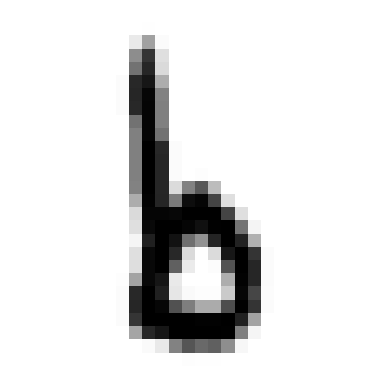

Done!
1


In [14]:
plt.imshow(X_train[0], cmap="binary")
plt.axis('off')
plt.show()
print("Done!")
print(y_train[0])

The labels are the class IDs (represented as int64), from 0 to 25:

In [15]:
print(y_train)
unique_elements, counts = np.unique(y_train, return_counts=True)
print("Elementi unici:", unique_elements) #etichette...c'è anche -1, ma non ce dovrebbe sta
print("Conteggio degli elementi:", counts) #distribuzione
print("Done!")

[ 1 11 17 ...  6  3 12]
Elementi unici: [ 0  1  2  3  4  5  6  7  8  9 10 11 12 13 14 15 16 17 18 19 20 21 22 23
 24 25]
Conteggio degli elementi: [2519 2556 2561 2505 2580 2493 2527 2587 2527 2490 2541 2517 2548 2522
 2517 2565 2541 2518 2552 2560 2527 2534 2556 2573 2548 2576]
Done!


Here are the corresponding class names:

In [16]:
class_names = ["A", "B", "C", "D", "E", "F", "G", "H", "I", "J", "K", "L", "M", "N", "O", "P",
              "Q", "R", "S", "T", "U", "V", "W", "X", "Y", "Z",]
print("Done!")

Done!


So the first image in the training set is a:

In [17]:
print(class_names[y_train[0]])
print("Done!")

B
Done!


The validation set contains 5,000 images, and the test set contains 17,760 images:

In [18]:
print(X_valid.shape)
print("Done!")

(5000, 28, 28)
Done!


In [19]:
print(X_test.shape)
print("Done!")

(17760, 28, 28)
Done!


Let's take a look at a sample of the images in the dataset:

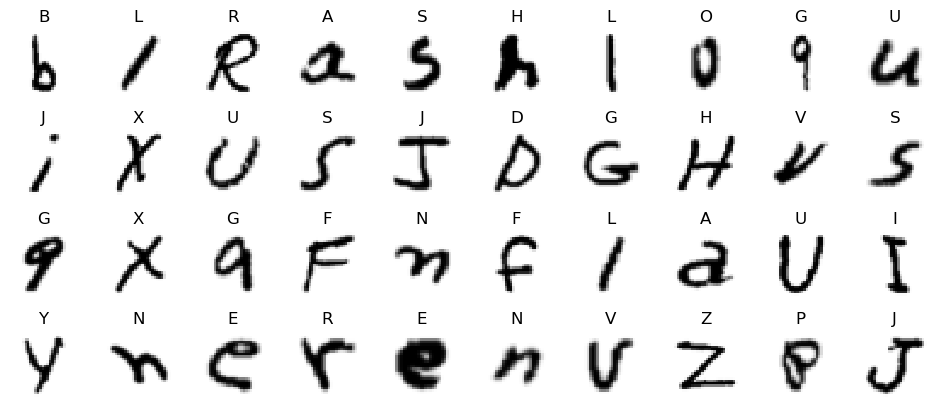

Done!


In [20]:
#Definisco il numero di righe e colonne nell'array di grafici
n_rows = 4
n_cols = 10

#Crea una figura di matplotlib con una dimensione totale calcolata in base al numero di colonne e righe specificato, 
#moltiplicato per 1.2 per ottenere uno spaziamento adeguato
plt.figure(figsize=(n_cols * 1.2, n_rows * 1.2))


for row in range(n_rows):
    for col in range(n_cols):
        index = n_cols * row + col
        plt.subplot(n_rows, n_cols, index + 1)
        plt.imshow(X_train[index], cmap="binary", interpolation="nearest")
        plt.axis('off')
        plt.title(class_names[y_train[index]], fontsize=12)
plt.subplots_adjust(wspace=0.2, hspace=0.5)
plt.show()
print("Done!")

In [21]:
#definisco un modello di rete neurale sequenziale utilizzando TensorFlow e Keras
model = keras.models.Sequential()
model.add(keras.layers.Flatten(input_shape=[28, 28])) #input di immagini 28x28
model.add(keras.layers.Dense(300, activation="relu"))
model.add(keras.layers.Dense(100, activation="relu"))
model.add(keras.layers.Dense(26, activation="softmax")) #26 etichette finali
print("Done!")


Done!


In [22]:
#restituisce una rappresentazione testuale del modello, mostrando una panoramica degli strati, 
#delle forme degli input e degli output di ciascuno strato, nonché del numero totale di parametri addestrabili nel modello
model.summary()
print("Done!")

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 flatten (Flatten)           (None, 784)               0         
                                                                 
 dense (Dense)               (None, 300)               235500    
                                                                 
 dense_1 (Dense)             (None, 100)               30100     
                                                                 
 dense_2 (Dense)             (None, 26)                2626      
                                                                 
Total params: 268226 (1.02 MB)
Trainable params: 268226 (1.02 MB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________
Done!


In [23]:
#generare un diagramma del modello e salvarlo come un file di immagine
keras.utils.plot_model(model, "my_letters_mnist_model.png", show_shapes=True)
# requires  pydot (`pip install pydot`) and graphviz 
print("Done!")

You must install pydot (`pip install pydot`) and install graphviz (see instructions at https://graphviz.gitlab.io/download/) for plot_model to work.
Done!


In [24]:
model.compile(loss="sparse_categorical_crossentropy", #funzione di perdita utilizzata
              optimizer="sgd", #ottimizzatore, stochastic gradient descent
              metrics=["accuracy"]) #matrica->accuracy (percentuale predizioni corrette su totali
print("Done!")


Done!


This is equivalent to:

```python
model.compile(loss=keras.losses.sparse_categorical_crossentropy,
              optimizer=keras.optimizers.SGD(),
              metrics=[keras.metrics.sparse_categorical_accuracy])
```

Alleno il modello con 30 epoche secondo il training set e tenendo in considerazione il validation set

In [25]:
history = model.fit(X_train, y_train, epochs=30,
                    validation_data=(X_valid, y_valid))
print("Done!")

Epoch 1/30


2064/2064 [==============================] - 13s 6ms/step - loss: 1.6434 - accuracy: 0.5511 - val_loss: 1.1341 - val_accuracy: 0.6710
Epoch 2/30
2064/2064 [==============================] - 10s 5ms/step - loss: 0.9814 - accuracy: 0.7159 - val_loss: 0.9025 - val_accuracy: 0.7394
Epoch 3/30
2064/2064 [==============================] - 10s 5ms/step - loss: 0.7968 - accuracy: 0.7713 - val_loss: 0.7637 - val_accuracy: 0.7818
Epoch 4/30
2064/2064 [==============================] - 11s 5ms/step - loss: 0.6750 - accuracy: 0.8037 - val_loss: 0.6635 - val_accuracy: 0.8064
Epoch 5/30
2064/2064 [==============================] - 10s 5ms/step - loss: 0.5912 - accuracy: 0.8270 - val_loss: 0.5991 - val_accuracy: 0.8214
Epoch 6/30
2064/2064 [==============================] - 10s 5ms/step - loss: 0.5299 - accuracy: 0.8441 - val_loss: 0.5520 - val_accuracy: 0.8362
Epoch 7/30
2064/2064 [==============================] - 10s 5ms/step - loss: 0.4827 - accuracy: 0.8570 - val_loss: 0.5163 - val_

Tracciamento delle curve di apprendimento

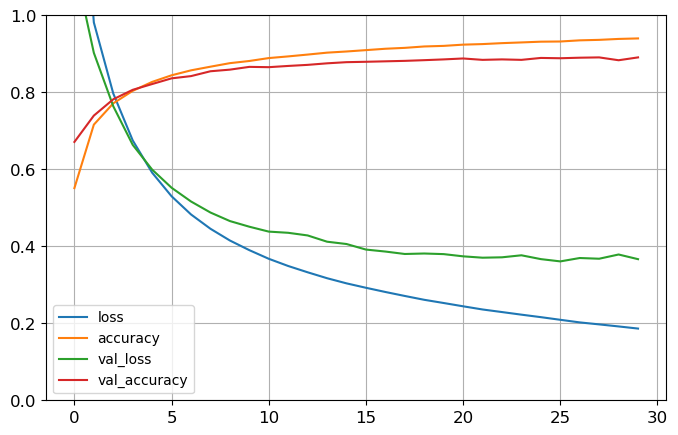

Done!


In [26]:
import pandas as pd

pd.DataFrame(history.history).plot(figsize=(8, 5))
plt.grid(True)
plt.gca().set_ylim(0, 1)
plt.show()
print("Done!")

valuta la rete addestrata sul test set

In [27]:
model.evaluate(X_test, y_test)
print("Done!")

555/555 [==============================] - 2s 3ms/step - loss: 0.3471 - accuracy: 0.8921
Done!


eseguo la previsione di probabilità sui primi 3 dati del test set (X_new) utilizzando
il modello addestrato

In [28]:
X_new = X_test[:3]
y_proba = model.predict(X_new)
print(y_proba.round(2)) #ogni riga mi da la probabilità che appartenga a quell'etichetta
print("Done!")

1/1 [==============================] - 0s 281ms/step
[[0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.
  0.   0.   0.   0.   0.   0.   0.99 0.   0.   0.   0.   0.  ]
 [0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.
  0.   0.   0.   0.   0.   0.   0.   1.   0.   0.   0.   0.  ]
 [0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.
  0.   0.   0.   0.   0.   1.   0.   0.   0.   0.   0.   0.  ]]
Done!


In [29]:
#mi da le etichette predette
y_pred = np.argmax(model.predict(X_new), axis=-1)
print(np.array(class_names)[y_pred]) #mi da le labels piu probabili
print("Done!")

1/1 [==============================] - 0s 60ms/step
['U' 'V' 'T']
Done!


In [30]:
#mi da le etichette reali
y_new = y_test[:3]
print(y_new)
print(class_names[y_new[0]], class_names[y_new[1]], class_names[y_new[2]])
print("Done!")

[20 21 19]
U V T
Done!


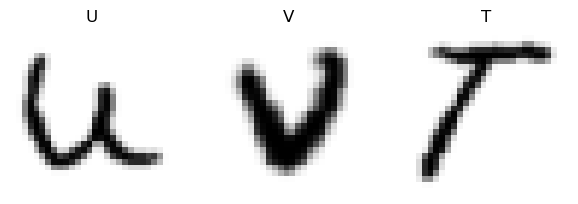

Done!


In [31]:
#mi grafico le immagini corrispondenti a questi 3 dati
plt.figure(figsize=(7.2, 2.4))
for index, image in enumerate(X_new):
    plt.subplot(1, 3, index + 1)
    plt.imshow(image, cmap="binary", interpolation="nearest")
    plt.axis('off')
    plt.title(class_names[y_test[index]], fontsize=12)
plt.subplots_adjust(wspace=0.2, hspace=0.5)
plt.show()
print("Done!")

### Additional metrics

In [32]:
#altre metriche per le 26 etichette
from sklearn.metrics import classification_report
y_pred = np.argmax(model.predict(X_test), axis=-1)

print(classification_report(y_test, y_pred))
print("Done!")

555/555 [==============================] - 2s 3ms/step
              precision    recall  f1-score   support

           0       0.79      0.92      0.85       695
           1       0.91      0.91      0.91       657
           2       0.94      0.92      0.93       653
           3       0.84      0.93      0.88       695
           4       0.94      0.93      0.94       661
           5       0.94      0.93      0.94       698
           6       0.74      0.80      0.77       657
           7       0.91      0.89      0.90       657
           8       0.70      0.80      0.74       693
           9       0.91      0.91      0.91       719
          10       0.93      0.90      0.91       703
          11       0.78      0.67      0.72       713
          12       0.97      0.94      0.96       649
          13       0.92      0.89      0.90       655
          14       0.92      0.95      0.94       713
          15       0.93      0.95      0.94       678
          16       0.87   

## Saving and Restoring

salvo l'intero modello, compresi i pesi e la configurazione, in un file nel formato HDF5.

In [33]:
model.save("my_keras_model.h5")
print("Done!")

Done!


C:\Users\3204480343\Downloads\anaconda3\lib\site-packages\keras\src\engine\training.py:3103: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


carico il modello senza addestrarlo nuovamente

In [34]:
model = keras.models.load_model("my_keras_model.h5")
print("Done!")

Done!


In [35]:
#prova che sia caricato, escono i stessi risultati sui 3 dati del test set
y_proba = model.predict(X_new)
print(y_proba.round(2))
print("Done!")

1/1 [==============================] - 0s 228ms/step
[[0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.
  0.   0.   0.   0.   0.   0.   0.99 0.   0.   0.   0.   0.  ]
 [0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.
  0.   0.   0.   0.   0.   0.   0.   1.   0.   0.   0.   0.  ]
 [0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.
  0.   0.   0.   0.   0.   1.   0.   0.   0.   0.   0.   0.  ]]
Done!


# TensorBoard

conterrà il percorso completo della directory di log principale, che potrebbe essere utilizzato, 
ad esempio, per organizzare i log in modo strutturato durante l'addestramento di modelli

In [36]:
root_logdir = os.path.join(os.curdir, "my_logs")
print("Done!")

Done!


In sintesi, questa struttura consente di organizzare i log in una struttura gerarchica 
basata sulla data e l'ora di esecuzione delle run del modello, il che può essere utile 
per tenere traccia dei vari addestramenti e delle relative registrazioni

In [37]:
def get_run_logdir():
    import time
    run_id = time.strftime("run_%Y_%m_%d-%H_%M_%S")
    return os.path.join(root_logdir, run_id)

run_logdir = get_run_logdir()
print(run_logdir)
print("Done!")

.\my_logs\run_2024_01_30-15_13_02
Done!


creo una copia del modello esistente. La nuova istanza del modello sarà identica in termini
di architettura, ma i pesi non saranno condivisi

In [38]:
model = tf.keras.models.clone_model(model) #creo una copia del modello esistente

#ricompilo il modello nello stesso modo di sopra
model.compile(loss="sparse_categorical_crossentropy",
              optimizer="sgd",
              metrics=["accuracy"])
print("Done!")

Done!


To start the TensorBoard server, one option is to open a terminal, if needed activate the virtualenv where you installed TensorBoard, go to this notebook's directory, then type:

```bash
$ tensorboard --logdir=./my_logs --port=6006
```

You can then open your web browser to [localhost:6006](http://localhost:6006) and use TensorBoard. 
Alternatively, you can load TensorBoard using a Jupyter/Colab extension and run it like this:

avviare TensorBoard, uno strumento di visualizzazione interattivo fornito con TensorFlow per
monitorare e analizzare l'addestramento di modelli di machine learning
-%load_ext tensorboard: Carica l'estensione TensorBoard in Jupyter Notebook.
-%tensorboard --logdir=./my_logs --port=6006: Avvia TensorBoard specificando la directory dei 
log (--logdir=./my_logs) e la porta (--port=6006). TensorBoard verrà eseguito sulla porta 6006

Dopo aver eseguito questo codice, puoi accedere a TensorBoard nel tuo browser all'indirizzo http://localhost:6006/. Questo ti fornirà una visualizzazione interattiva delle curve di apprendimento, delle distribuzioni dei pesi, delle attività degli strati e altro ancora, rendendo più facile comprendere e monitorare le prestazioni del modello durante l'addestramento

In [39]:
%load_ext tensorboard
%tensorboard --logdir=./my_logs --port=6006
print("Done!")

Reusing TensorBoard on port 6006 (pid 14720), started 2 days, 22:38:43 ago. (Use '!kill 14720' to kill it.)

Done!


utilizza il callback TensorBoard di TensorFlow/Keras durante l'addestramento del modello

In [40]:
tensorboard_cb = keras.callbacks.TensorBoard(run_logdir)
history = model.fit(X_train, y_train, epochs=30,
                    validation_data=(X_valid, y_valid),
                    callbacks=[tensorboard_cb])
print("Done!")

Epoch 1/30
2064/2064 [==============================] - 13s 6ms/step - loss: 1.6497 - accuracy: 0.5520 - val_loss: 1.1402 - val_accuracy: 0.6676
Epoch 2/30
2064/2064 [==============================] - 11s 5ms/step - loss: 0.9876 - accuracy: 0.7148 - val_loss: 0.9097 - val_accuracy: 0.7438
Epoch 3/30
2064/2064 [==============================] - 11s 5ms/step - loss: 0.8053 - accuracy: 0.7693 - val_loss: 0.7767 - val_accuracy: 0.7764
Epoch 4/30
2064/2064 [==============================] - 11s 5ms/step - loss: 0.6841 - accuracy: 0.8013 - val_loss: 0.6744 - val_accuracy: 0.8076
Epoch 5/30
2064/2064 [==============================] - 11s 6ms/step - loss: 0.5988 - accuracy: 0.8245 - val_loss: 0.6087 - val_accuracy: 0.8222
Epoch 6/30
2064/2064 [==============================] - 12s 6ms/step - loss: 0.5375 - accuracy: 0.8418 - val_loss: 0.5650 - val_accuracy: 0.8288
Epoch 7/30
2064/2064 [==============================] - 12s 6ms/step - loss: 0.4896 - accuracy: 0.8556 - val_loss: 0.5276 - val_ac